# Assignment 2: 02805 Social graphs and interactions 
### Group 65:
- s184139, Oliver Low Petersen
- s211901, Lucas Bonde Kræmmer Petersen
- s226625, Emma Rebner 


# **Part 1: Network Analysis**

**Present an analysis/description of the network of bands/artists using tools from Lecture 5. Include concepts such as: assortativity, centrality, backbone**

In [1]:
import urllib.request
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Loading the graph
url = "https://raw.githubusercontent.com/Emmsiiii/Assignment-1---02805-Social-Graphs-and-Interactions/main/rock_artists_network.gexf"
urllib.request.urlretrieve(url, "rock_artists_network.gexf")
G = nx.read_gexf("rock_artists_network.gexf")
G.remove_node('AC/DC')
G_un = G.to_undirected()
print(G)
print(list(G.nodes(data=True))[0])

DiGraph with 484 nodes and 7285 edges
('10cc', {'word_count': 11040, 'label': '10cc'})


Let's start by looking into the centrality of the network. 

In [3]:
# Find 5 most according to betweeness centality 
degree_centrality = nx.degree_centrality(G)
#print(between)
df_degree = pd.DataFrame(list(degree_centrality.items()), columns=["Artist", "degree centrality"])
df_degree = df_degree.sort_values(by="degree centrality", ascending=False)
df_degree.reset_index(drop=True, inplace=True)
print(df_degree.head(5))

          Artist  degree centrality
0   Led Zeppelin           0.306418
1  Black Sabbath           0.275362
2   Queen (band)           0.275362
3      Metallica           0.271222
4      Bob Dylan           0.258799


So with the degree centrality we can get an ordered list like the one above displaying the 5 artist with most links in general. Interestingly the artist with most links are also some of the biggest commercial, cultural rock bands in rock music history arguably. These include bands like Led Zeppelin, Black sabbath and Queen. All three of them emerged around the end of the 1960s. 

The next question we can ask is what kind of links are formed to these artist from other pages ? We can inspect by finding the neighbours for Led Zeppelin and see what kind of links are made from their wikipages.


In [4]:
list(G.neighbors('Led Zeppelin'))[:13]

['Robert Plant',
 'The Yardbirds',
 'The Who',
 'Steve Winwood',
 'Bad Company',
 'Phil Collins',
 'Aerosmith',
 'Neil Young',
 'Alter Bridge',
 'Deep Purple',
 'Black Sabbath',
 'Janis Joplin',
 'Jethro Tull (band)']

We see among the Neighbours we have:
* **Robert Plant** which makes sense since he was the Lead singer in **Led Zeppelin**. 
* **The Yardbirds** which was a band formed by the members of Led Zeppelin before Led Zeppelin was formed
* **The Who** which contains members who have collaborated with members of Led Zeppelin 
* **Steve Winwood** who was considered as vocalist for another band before Led Zeppelin formed 
* **Phil Collins** played drums on the first Led Zeppelin Record
* **Black Sabbath** have played at the same events as Led Zeppelin 

So we see examples of links being formed from collaborations, band member crossovers, Solo artist being members of other bands and simply appearing together at similar events. And if you are one of the first successful rock bands and play for 10 years you are gonna have a lot of time to appear at multiple events and with that be mentioned on multiple wikipedia pages where you have appeared together with other popular and new upcoming bands.

Let's look at the Eigen centrality.

In [5]:
eigen_centrality = nx.eigenvector_centrality(G)
#print(eigen_centrality)
df_eigen = pd.DataFrame(list(eigen_centrality.items()), columns=["Artist", "Eigen centrality"])
df_eigen = df_eigen.sort_values(by="Eigen centrality", ascending=False)
df_eigen.reset_index(drop=True, inplace=True)
print(df_eigen.head(5))

          Artist  Eigen centrality
0   Led Zeppelin          0.226337
1  Black Sabbath          0.196162
2      Metallica          0.186270
3   Queen (band)          0.184953
4    David Bowie          0.159430


We see interestingly ordering the list based on the eigen centrality yields a lot of the same bands as in degree centrality. This is partially caused by the previous argument, that a lot of the popular bands which emerged around the same time have also appeared together at events which is mentioned on their pages. This causes some high degree nodes to be connected to other high degree nodes increasing the Eigen Centrality value for them individually.

To further support this we can also plot eigen centrality against degree centrality and see a positive arguably linear correlation between the two below:

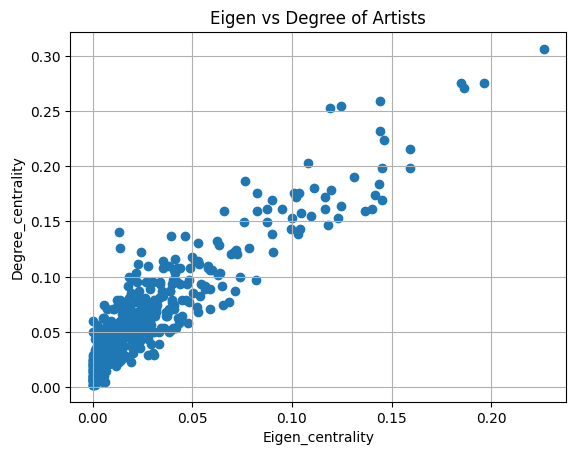

In [6]:
plt.scatter(nx.eigenvector_centrality(G).values(), nx.degree_centrality(G).values())

plt.xlabel('Eigen_centrality')
plt.ylabel('Degree_centrality')
plt.title('Eigen vs Degree of Artists')
plt.grid(True)

Let's look at the assortativity

In [7]:
degree_assortativity = nx.degree_assortativity_coefficient(G_un)
numeric_word_assortativity = nx.numeric_assortativity_coefficient(G_un, "word_count")

print("Degree assortativity coefficient:", degree_assortativity)
print("Word count assortativity coefficient:", numeric_word_assortativity)

Degree assortativity coefficient: 0.006304023825994466
Word count assortativity coefficient: 0.08388865732799519


We see the assortativity for the rock network based on degree is close to 0. This means the network is neither disassortative or assortative with respect to degree. Artist with many links do not necessarily exclusively link to artist with very high or very low number of links, but instead the links are distributed in the network. In other words the connections appear random with respect to degree. This could make sense in our rock network, since we have a few big degree nodes that might form links because of participating in shared events or collaborations. Then we also have smaller degree nodes linking to these high degree nodes due to inspiration or also participating at similar events, since at least at musical events big names are used to attract a crowd and then upcoming lesser known bands can perform their debut concerts attracting new audiences.

Similarly we see a value close to 0 as well for the word count. Indicating that bands with "dense" do not exclusively connect to other heavy text based pages or connect with the opposite either. The same argument as above can be applied here. Less known artist or niche genres of bands might have less text due to many reasons (fewer interviews, less public interest to write about them) but they can be linked due to simply participating in same events.

Let's do a backbone extraction of the network.

In [9]:
import netbone as nb
from netbone.filters import threshold_filter

In [10]:
# We use the undirected graph to create the weighted network and use edge betweenness centrality as the weights for each edge
edge_bet = nx.edge_betweenness_centrality(G_un)

In [11]:
# We extract the min and max values from the weights
min_bet, max_bet = min(edge_bet.values()), max(edge_bet.values())
print(f'min value:{min_bet}\nmax value: {max_bet}')

min value:0.0
max value: 0.004132231404958679


In [12]:
# We define a normalization function that normalizes the weights to be tween [1,100]
# min_bet and max_bet are searched for as global variables 
def normalize_bet(val):
    return 1 + 99 * (val - min_bet) / (max_bet - min_bet) if max_bet != min_bet else 1

In [13]:
# Create weighted network 1
G_w1 = nx.Graph()
G_w1.add_nodes_from(G_un.nodes(data=True))

# Looping over the edges from edge_between_centrality, adding all edges and the weights normalized
for (u, v), val in edge_bet.items():
    G_w1.add_edge(u, v, weight=normalize_bet(val))

# Result is the same graph as before only with the normalized weights between all edges
print("Weighted Network 1 created with weights in [1, 100]")
print(G_w1.edges(data=True))

Weighted Network 1 created with weights in [1, 100]
[('10cc', 'The Yardbirds', {'weight': 6.356343280205184}), ('10cc', 'Simon & Garfunkel', {'weight': 6.681716421738982}), ('10cc', 'The Hollies', {'weight': 7.738145621780264}), ('10cc', "Herman's Hermits", {'weight': 5.7160777264245715}), ('10cc', 'Frank Zappa', {'weight': 7.490178235465415}), ('10cc', 'Queen (band)', {'weight': 21.44806976064553}), ('10cc', 'Roxy Music', {'weight': 8.69154872953104}), ('10cc', 'George Harrison', {'weight': 5.898438919401389}), ('10cc', 'Asia (band)', {'weight': 6.8143540495561}), ('10cc', 'The Police', {'weight': 6.705277874464345}), ('10cc', 'Duran Duran', {'weight': 9.360611495155304}), ('10cc', 'Peter Gabriel', {'weight': 7.507814303188453}), ('10cc', 'The Clash', {'weight': 9.494892294125057}), ('10cc', 'Jethro Tull (band)', {'weight': 6.516977596607696}), ('10cc', 'Ramones', {'weight': 13.933960931000476}), ('10cc', 'Paul McCartney', {'weight': 10.401847623871753}), ('10cc', 'Ringo Starr', {'wei

In [ ]:
# Extacrting the edges to df
df_w1 = nx.to_pandas_edgelist(G_w1)

In [ ]:
# Applying the disparity filter
disparity_w1 = nb.disparity(df_w1)

In [ ]:
# Filtering values based on threshold 
alpha1 = 0.12
b_filtered1 = threshold_filter(disparity_w1, alpha1)
print(b_filtered1)

Disparity Filter
Graph with 361 nodes and 375 edges


In [19]:
# Only keeping the maximum giant component
b_filtered1_cc = b_filtered1.subgraph(max(nx.connected_components(b_filtered1), key=len)).copy()
print(b_filtered1_cc)

Graph with 312 nodes and 343 edges


Let's compare the backbone to the original graph we extracted it from.

In [21]:
print(f'Nodes: {G_un.number_of_nodes(), b_filtered1.number_of_nodes()}')
print(f'Edges: {G_un.number_of_edges(), b_filtered1.number_of_edges()}')
print(f'Density:{nx.density(G_un), nx.density(b_filtered1)}')
print(f'Clustering: {nx.average_clustering(G_un), nx.average_clustering(b_filtered1)}')

Nodes: (484, 361)
Edges: (5988, 375)
Density:(0.051229403008059136, 0.0057710064635272396)
Clustering: (0.2350278614067602, 0.001978630787495053)


Comparing the two networks above we see the amount of nodes have been reduced by a 120 and the edges has been reduced by more than 5000.
This explains both density which is almost 10 times less and clustering being 100 times less. The reduce in clustering indicates we potentially lost a lot of nuances in the smaller hubs and community interactions, meaning the reduced backbone shouldn't be used in of itself to do an analysis of the network.

Let's plot the backbone with node size dependend on node degree and see what we can derive

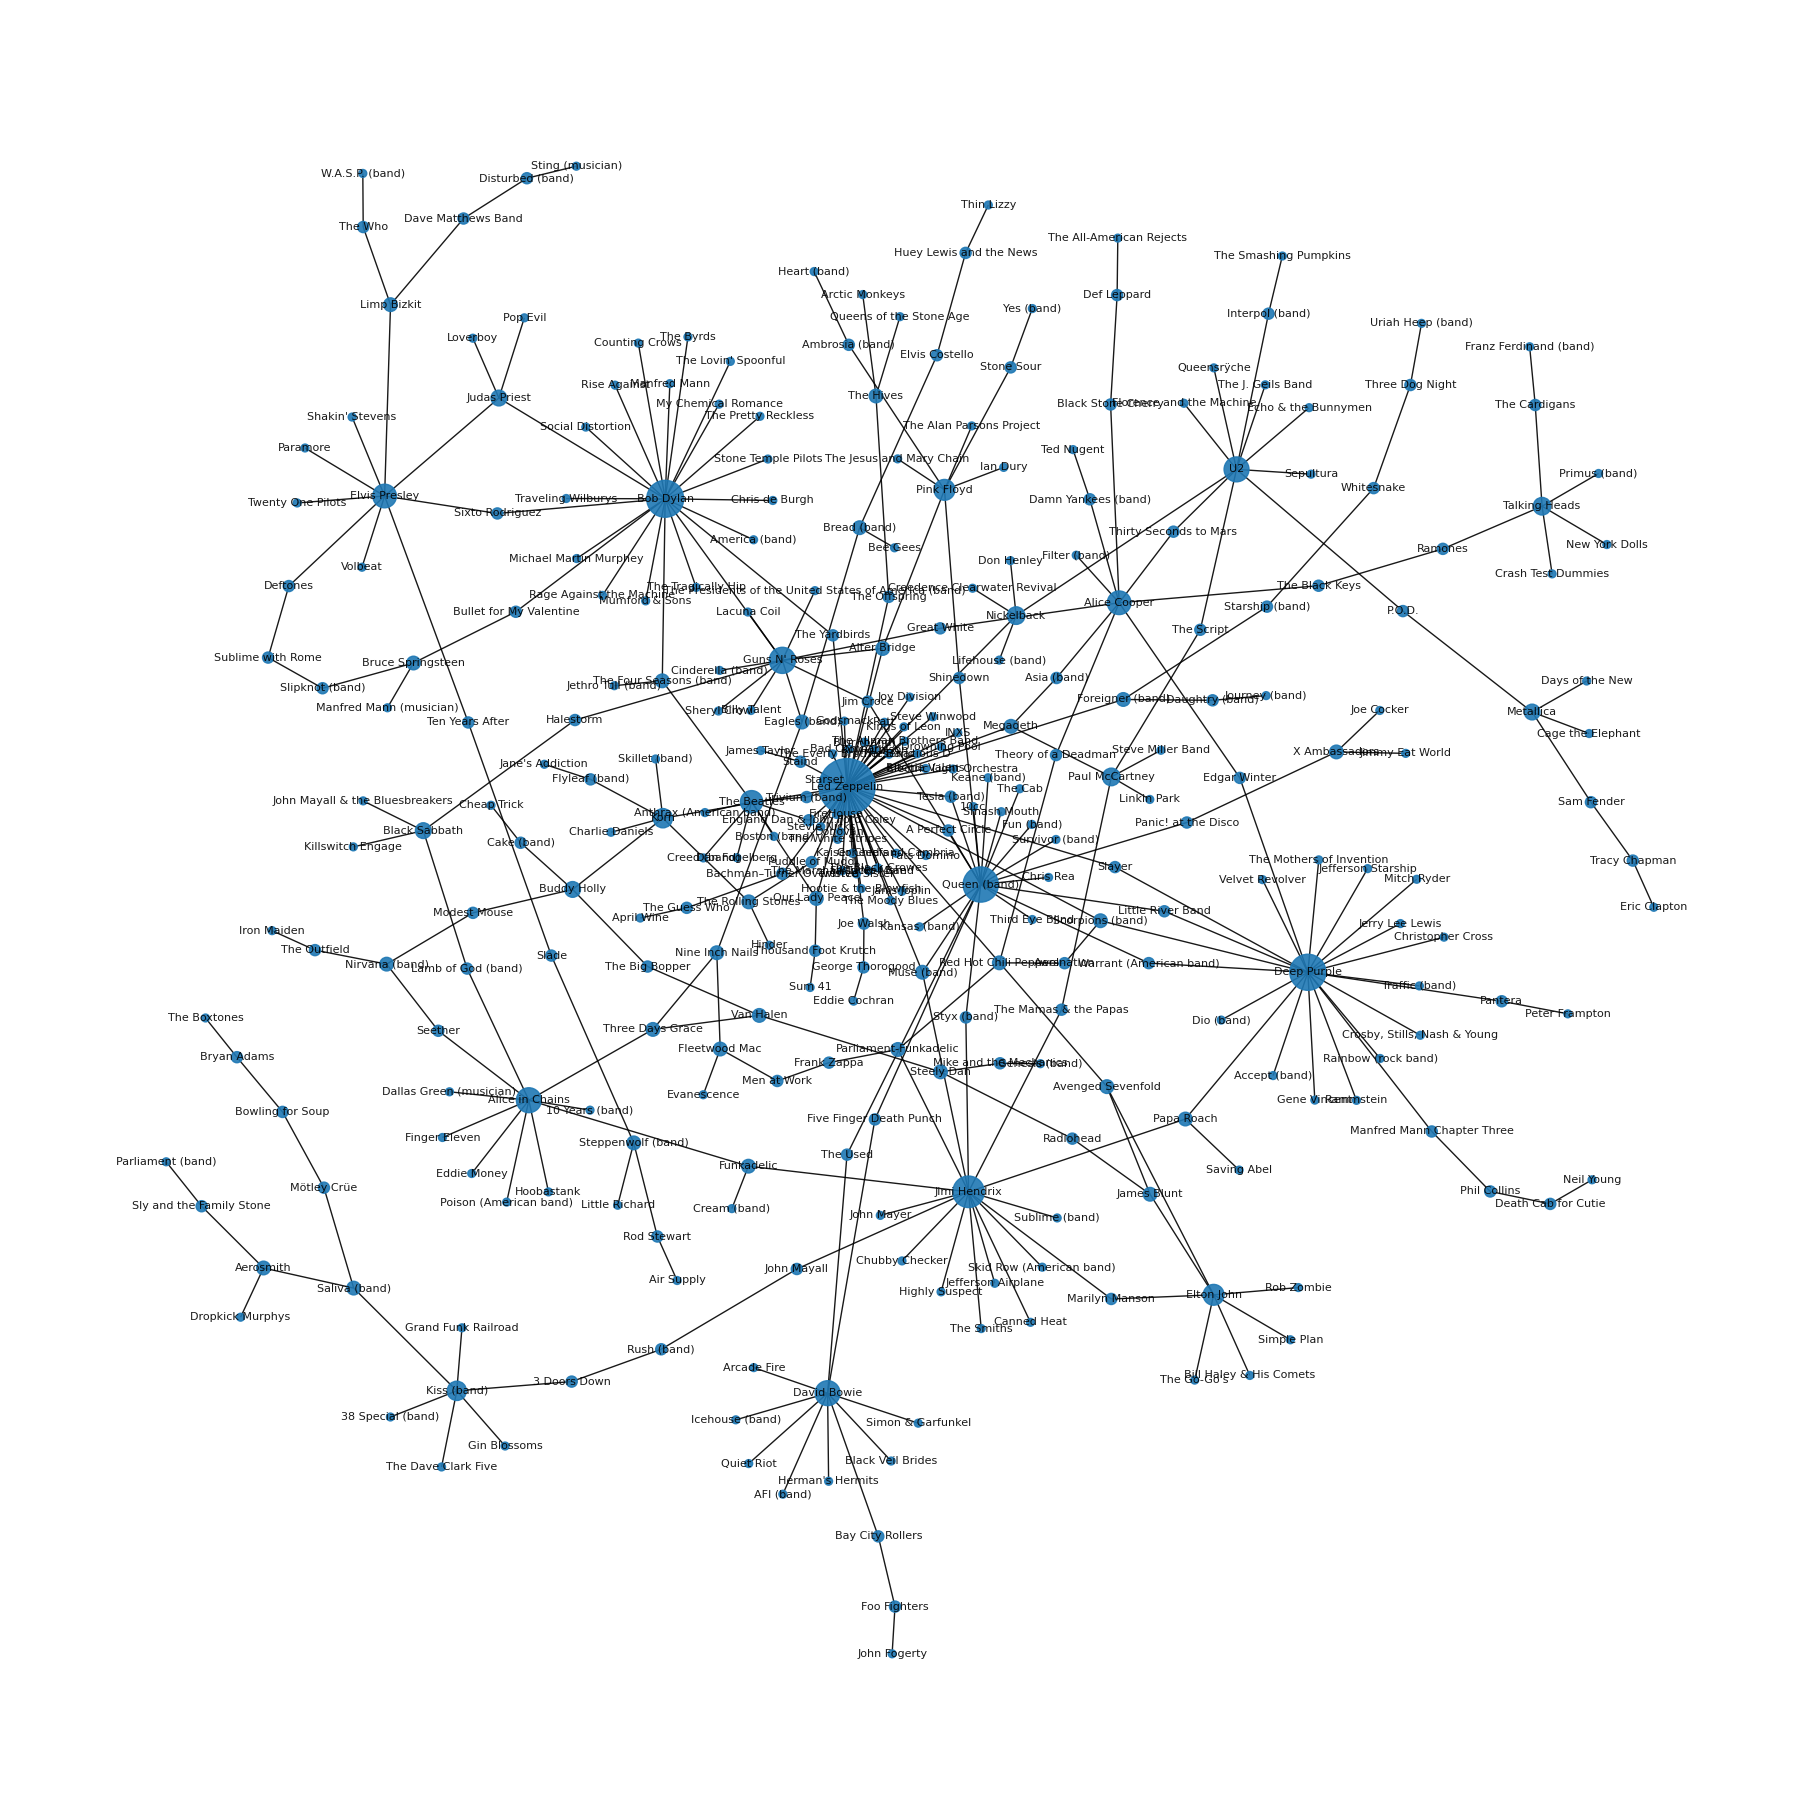

In [18]:
# Play with the force atlas algorhitm to get a visualization you like
degree_b1 = nx.degree_centrality(b_filtered1_cc)
plt.figure(figsize=(18, 18))
pos = nx.forceatlas2_layout(
    b_filtered1,
    scaling_ratio=1,
    gravity=25, # Applies center of gravity to 
    max_iter=700
)

# Scale node sizes by eigen centrality (normalize for readability)
sizes_b1 = [v * 10000 for v in degree_b1.values()]  # 5000 = scale factor, adjust as needed

# Draw graph
nx.draw(
    b_filtered1_cc,
    pos=pos,
    with_labels=True,
    node_size=sizes_b1,
    alpha=0.9,
    font_size=8
)
plt.show()

We see the backbone captures some of the structures obtained from the centrality analyses and looking into the neighbours. We have Led Zeppelin being the largest node of the network, and Queen, Bob Dylan, David Bowie being second to that. We see these larger nodes being at the center of shortest path between many nodes but we also see the lack of interconnectivity or the reduced clustering among the nodes higlighting the loss of nuances of interactions the graph.

# **Part 2: Genres and communities and plotting**

## 1) Write about genres and modularity.
**Answer:** 
Modularity evaluates how well a network is divided into communities by comparing how densely connected nodes are within the same group versus between different groups. In this case, genre labels extracted from the artists’ Wikipedia infoboxes are used to form the partitions. The modularity value lies between 0 and 1, where higher values indicate that the partition reflects a meaningful community structure, and lower values indicate a weak correspondence. A high modularity would therefore suggest that genre categories align closely with the underlying structure of the network, while a low modularity would suggest that genre is not a strong indicator of how the artists are actually organized within the network.

## 2) Detect the communities, discuss the value of modularity in comparison to the genres.

In [1]:
import pickle
import requests
import networkx as nx
import numpy as np
import pandas as pd
import re
import random
from collections import defaultdict
from networkx.algorithms.community import louvain_communities
from networkx.algorithms.community.quality import modularity
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm



# Download and load dataset
url = "https://raw.githubusercontent.com/Emmsiiii/Assignment-2---02805-Social-Graphs-and-Interactions/main/rock_performers_with_genres-2.pkl"
filename = "rock_performers_with_genres-2.pkl"

response = requests.get(url)
with open(filename, "wb") as f:
    f.write(response.content)

with open(filename, "rb") as f:
    data = pickle.load(f)

# Clean genres 
for entry in data:
    raw = entry.get("genre", "")
    genres = re.split(r"[;,/\n]+|\s{2,}", raw.lower().strip())
    entry["genres"] = [g.strip() for g in genres if g.strip()]

# Build undirected graph 
G = nx.Graph()
names = {d["page_name"] for d in data}
genre_map = {d["page_name"]: d["genres"] for d in data}

for entry in data:
    src = entry["page_name"]
    content = entry["content"].lower()
    G.add_node(src, genres=genre_map.get(src, []))
    for tgt in names:
        if src != tgt and tgt.lower() in content:
            G.add_edge(src, tgt)

# Largest connected component 
G = G.subgraph(max(nx.connected_components(G), key=len)).copy()

#Filter nodes with genres 
G_genre = G.subgraph([n for n in G.nodes if G.nodes[n].get("genres")]).copy()

# Helper for modularity 
def compute_modularity(graph, partition_dict):
    communities = list(partition_dict.values())
    L = graph.number_of_edges()
    Q = 0
    for community in communities:
        subG = graph.subgraph(community)
        Lc = subG.number_of_edges()
        kc = sum(dict(graph.degree(community)).values())
        Q += Lc / L - (kc / (2 * L))**2
    return Q

# Modularity by first genre
partition_first = defaultdict(set)
for node in G_genre.nodes:
    first = G_genre.nodes[node]["genres"][0]
    partition_first[first].add(node)

mod_first = compute_modularity(G_genre, partition_first)

# Modularity by first non-rock genre 
partition_non_rock = defaultdict(set)
for node in G_genre.nodes:
    non_rock = next((g for g in G_genre.nodes[node]["genres"] if g != "rock"), G_genre.nodes[node]["genres"][0])
    partition_non_rock[non_rock].add(node)

mod_non_rock = compute_modularity(G_genre, partition_non_rock)

# Modularity by random genre 
partition_random = defaultdict(set)
for node in G_genre.nodes:
    rnd = random.choice(G_genre.nodes[node]["genres"])
    partition_random[rnd].add(node)

mod_random = compute_modularity(G_genre, partition_random)

# Modularity by alphabetical genre 
partition_alpha = defaultdict(set)
for node in G_genre.nodes:
    sorted_genres = sorted(G_genre.nodes[node]["genres"])
    if sorted_genres:
        alpha = sorted_genres[0]
        partition_alpha[alpha].add(node)

mod_alpha = compute_modularity(G_genre, partition_alpha)

# Louvain communities 
communities_louvain = louvain_communities(G_genre, seed=42)
mod_louvain = modularity(G_genre, communities_louvain)

# Output results 
print(f"Modularity (First genre):       {mod_first:.4f}")
print(f"Modularity (Non-rock genre):    {mod_non_rock:.4f}")
print(f"Modularity (Random genre):      {mod_random:.4f}")
print(f"Modularity (Alphabetical genre):{mod_alpha:.4f}")
print(f"Modularity (Louvain):           {mod_louvain:.4f}")
print(f"Number of Louvain communities:  {len(communities_louvain)}")


Modularity (First genre):       0.0484
Modularity (Non-rock genre):    0.0438
Modularity (Random genre):      0.0142
Modularity (Alphabetical genre):0.0963
Modularity (Louvain):           0.3355
Number of Louvain communities:  7


**Answer:**  The modularity values show a clear distinction between data-driven community detection (Louvain) and genre-based partitions. The Louvain algorithm produce a modularity of 0.3355, which is substantially higher than any of the genre-based partitionings. This suggests that the communities detected by the network structure better capture the actual grouping of artists than genre labels do.
Among the genre-based approaches, using the alphabetically first genre performs best with a modularity of 0.0963, while the first listed genre and first non-rock genre produce a lower modularities around 0.0484 and 0.0438. The random genre baseline performs worst, with a modularity of only 0.0142, serving as a useful control.
These results indicate that while genre does contain some information about how artists are grouped, it is a weak signal in comparison to the patterns found directly in the network. Genre labels may be noisy, overlapping, or inconsistent across artists. Moreover, artists are often associated with multiple genres, which complicates any partitioning based solely on genre metadata.
In contrast, the Louvain method identifies 7 communities based entirely on the structure of connections between artists. The relatively high modularity score suggests that these structural communities are well-defined and capture real clustering behavior in the network, reflecting shared influences, collaborations, or cultural proximity beyond genre labels.

## 3) Calculate the matrix D and discuss your findings.


D: Confusion Matrix (Top Genres vs Louvain Communities):


,0,1,2,3,4,5,6
alternative rock,33,2,22,8,2,3,40
hard rock,37,3,1,26,3,16,13
pop rock,7,3,16,3,4,5,26
alternative metal,32,0,2,14,3,2,2
rock,2,6,0,4,2,4,24
heavy metal,6,0,1,21,1,7,3
post-grunge,25,0,2,4,0,2,5
pop,0,2,3,3,0,2,18
blues rock,3,0,0,7,1,4,12
pop-punk,1,0,14,1,0,0,6


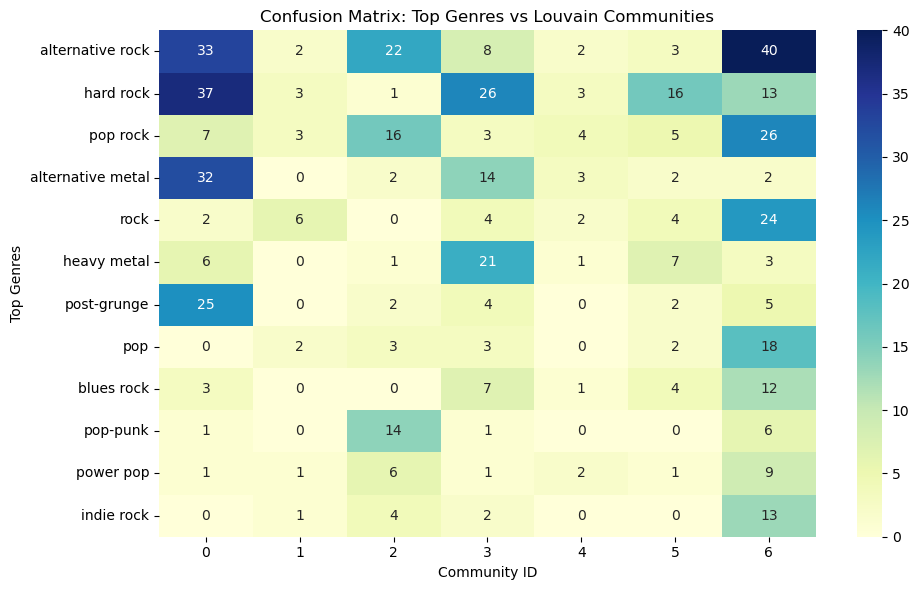

In [2]:
# Convert Louvain result → node → community id
node_to_community = {}
for i, comm in enumerate(communities_louvain):
    for node in comm:
        node_to_community[node] = i

# Build genre dictionary from graph attributes
genres_dict = {node: G_genre.nodes[node]["genres"] for node in G_genre.nodes}

# Count genre frequencies overall
genre_counts = {}
for node in G_genre.nodes:
    for g in genres_dict[node]:
        genre_counts[g] = genre_counts.get(g, 0) + 1

# Select the most common genres 
top_genres = sorted(genre_counts, key=genre_counts.get, reverse=True)[:12]

# Initialize matrix D with zeros
conf_matrix = pd.DataFrame(
    0,
    index=top_genres,
    columns=range(len(communities_louvain))
)

# Fill matrix (count how many bands of each genre land in each community)
for node in G_genre.nodes:
    comm = node_to_community[node]
    for g in genres_dict[node]:
        if g in top_genres:
            conf_matrix.loc[g, comm] += 1

print("\nD: Confusion Matrix (Top Genres vs Louvain Communities):")
display(conf_matrix)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix: Top Genres vs Louvain Communities")
plt.xlabel("Community ID")
plt.ylabel("Top Genres")
plt.tight_layout()
plt.show()


**Answer:** The confusion matrix compares the top genres with the Louvain-detected communities and shows how many artists from each genre fall into each community. Overall, genres are spread across multiple communities rather than being isolated to single groups. For example, alternative rock appears broadly across communities, but is most strongly represented in Community 0 and Community 6, indicating that genre alone does not fully determine community membership. Some genres do show partial alignment with the network structure. Hard rock is most concentrated in Communities 0 and 3, while heavy metal appears predominantly in Community 3, suggesting that these genres form more tightly connected sub-networks. In contrast, broad categories such as rock and pop are widely scattered across communities, which is expected because these labels cover many stylistic variations. The Louvain communities are derived from actual network connections, such as collaboration, influence, shared band members, or historical ties, rather than genre metadata. Therefore, they capture meaningful structural relationships that genre labels cannot fully represent. This aligns with the modularity results, where the Louvain partition achieved a higher modularity score than the genre-based partition, indicating that the network’s internal structure provides a better explanation for how artists cluster than genre categories alone.


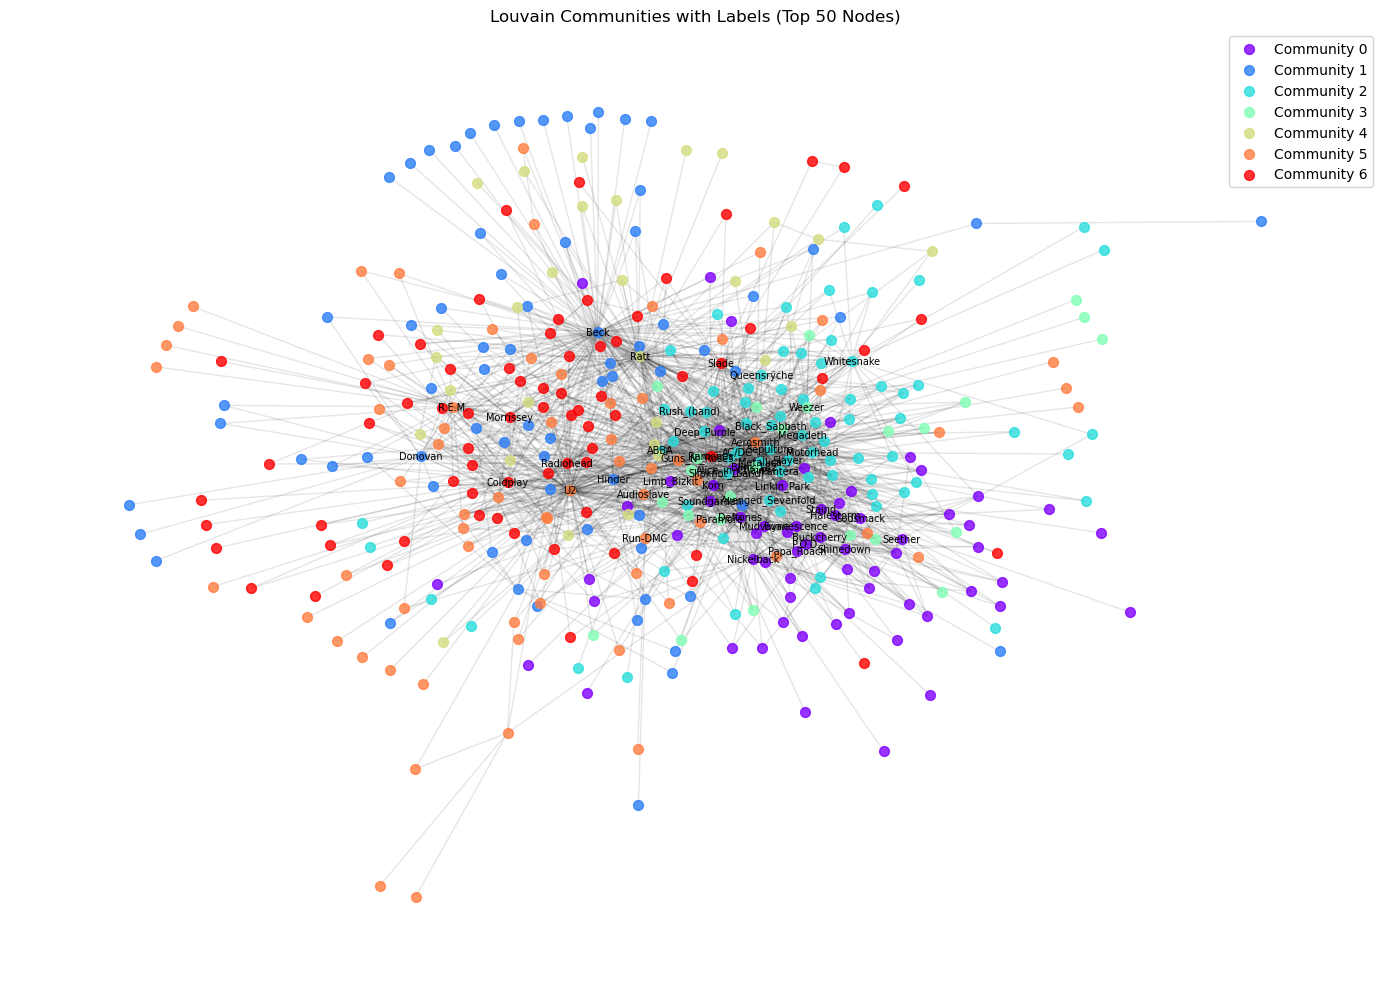

In [3]:
# Set community as node attribute
community_map = {}
for i, community in enumerate(communities_louvain):
    for node in community:
        community_map[node] = i
nx.set_node_attributes(G_genre, community_map, "community")

# Layout for consistent positioning
pos = nx.spring_layout(G_genre, seed=42)

# Color map
num_comms = len(communities_louvain)
colors = cm.rainbow(np.linspace(0, 1, num_comms))

# Plot
plt.figure(figsize=(14, 10))
for i, community in enumerate(communities_louvain):
    nx.draw_networkx_nodes(
        G_genre,
        pos,
        nodelist=community,
        node_color=[colors[i]],
        label=f"Community {i}",
        node_size=50,
        alpha=0.8
    )

# Draw edges
nx.draw_networkx_edges(G_genre, pos, alpha=0.1)

# Draw label (top 50 high-degree nodes to avoid clutter)
degrees = dict(G_genre.degree())
top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:50]
labels = {node: node for node in top_nodes}
nx.draw_networkx_labels(G_genre, pos, labels=labels, font_size=7, font_color="black")

plt.title("Louvain Communities with Labels (Top 50 Nodes)")
plt.axis("off")
plt.legend()
plt.tight_layout()
plt.show()


## 4) Plot the communities and comment on your results.

**Answer:** The plotted graph illustrates the Louvain-detected communities within the rock artist network. Each node represents an artist, and nodes are colored based on their assigned community. The 50 highest-degree nodes (most connected) are labeled to indicate key representatives of each cluster.
- Clear clustering: Distinct color groupings confirm that the Louvain algorithm successfully partitions the graph into structurally meaningful communities. These clusters are tightly packed, indicating high intra-community connectivity.
- Community boundaries: While the core of the network appears densely connected, peripheral nodes tend to form more isolated clusters, often corresponding to niche subgenres or localized influences.
- Overlap and blending: Some communities are visually interconnected, suggesting that artists span multiple genres or share broad connections. This supports earlier findings that genres do not perfectly align with structural communities.
- Influential nodes: Many of the labeled nodes (for example, Radiohead, Coldplay, Run-DMC, Beck) are highly connected, likely acting as bridges between communities. Their presence near the center reinforces their importance in the global network structure.
- Community diversity: The fact that top-labeled artists appear in multiple communities reflects genre fluidity in the rock domain, with artists often associated with multiple styles over time.

Overall, the visual confirms that the Louvain algorithm captures meaningful structural patterns, though these do not always align with genre-based classifications, further emphasizing that real-world artist relationships are more complex than genre labels alone can express.

# **Part 3) TF-IDF to understand genres and communities**

## 1) Explain the concept of TF-IDF in your own words and how it can help you understand the genres and communities.

**Answer:** TF-IDF (Term Frequency–Inverse Document Frequency) is a statistical weighting measure used in information retrieval and text analysis to evaluate the relative importance of a term within a particular document. The term frequency component captures how frequently a word appears in a document, reflecting its relevance within that specific text. The inverse document frequency component adjust this weight by penalizing words that are common across many documents, since such terms are less useful for distinguishing one document from another.
By combining these two components, TF-IDF assigns higher scores to words that occur frequently in a given document but are relatively uncommon in the wider collection of documents. This makes TF-IDF especially valuable for tasks such as document classification, topic identification, and clustering.
In the context of analyzing genres and communities, TF-IDF helps highlight terms that are particularly characteristic of each group. Because it emphasizes distinctive vocabulary rather than simply frequent vocabulary, it allows us to identify meaningful linguistic patterns or thematic signals that differentiate one genre or community from another. This supports deeper interpretation, comparison, and explanation of similarities and differences between groups. 

## 2) Calculate and visualize TF-IDF for the genres and communities.


### TOP TF-IDF WORDS — COMMUNITIES (Top Words) ###



,Community 0,Community 1,Community 2,Community 3,Community 4,Community 5,Community 6
0,cornell,adams,lavigne,black_sabbath,manson,gabriel,morrissey
1,soundgarden,clapton,weezer,osbourne,ronstadt,dylan,costello
2,evanescence,harrison,fall_out_boy,slayer,reznor,whitesnake,mccartney
3,linkin_park,badfinger,paramore,abba,kid_rock,vai,bowie
4,breaking_benjamin,nilsson,horizon,slade,rammstein,orbison,radiohead
5,godsmack,the_band,rise_against,megadeth,cocker,nugent,beck
6,incubus,springsteen,arcade_fire,mustaine,duran_duran,lennon,mellencamp
7,skillet,10cc,offspring,zappa,nine_inch_nails,amburn,petty
8,alter_bridge,oasis,hoppus,mot,limp_bizkit,richard,mayer
9,tley,benatar,delonge,rhead,chapin,collins,morrison



### TOP TF-IDF WORDS — GENRES (Top Words) ###



,alternative metal,alternative rock,groove metal,hard rock,heavy metal,indie rock,new wave,nu metal,pop rock,pop-punk,post-grunge,progressive rock,punk rock,rock
0,evanescence,weezer,pantera,whitesnake,osbourne,the_strokes,ant,limp_bizkit,fleetwood_mac,lavigne,nickelback,pink_floyd,ramones,mccartney
1,primus,coldplay,anselmo,coverdale,metallica,rubble,inxs,korn,monkees,fall_out_boy,daughtry,waters,clash,clapton
2,lee,beck,lamb,nugent,black_sabbath,ritz,blondie,slipknot,duran_duran,paramore,creed,genesis,green_day,costello
3,claypool,buckley,sepultura,aerosmith,mot,foals,sting,durst,rea,bowling,bush,rush,social_distortion,springsteen
4,deftones,muse,five_finger_death_punch,kiss,rhead,mfrom,talking_heads,borland,mcvie,hoppus,stapp,gilmour,offspring,joel
5,godsmack,scope,white_zombie,van_halen,cr,modest_mouse,stein,saliva,panic,delonge,doors_down,anderson,mclaren,petty
6,faith_no_more,garbage,god,slash,tley,vampire_weekend,copeland,jordison,valli,soup,gontier,banks,afi,mayer
7,mudvayne,linkin_park,max,dc,iommi,arctic_monkeys,harry,devenish21,nesmith,simple_plan,hinder,barrett,sex_pistols,byrds
8,moreno,corgan,rockmusic,simmons,dio,chaospin,the_police,lethal,buckingham,sum,seether,jethro_tull,strummer,nilsson
9,staind,morissette,kisser,ac,iron_maiden,koenig,summers,crahan,four_seasons,reddick,three_days_grace,gabriel,ness,beach_boys


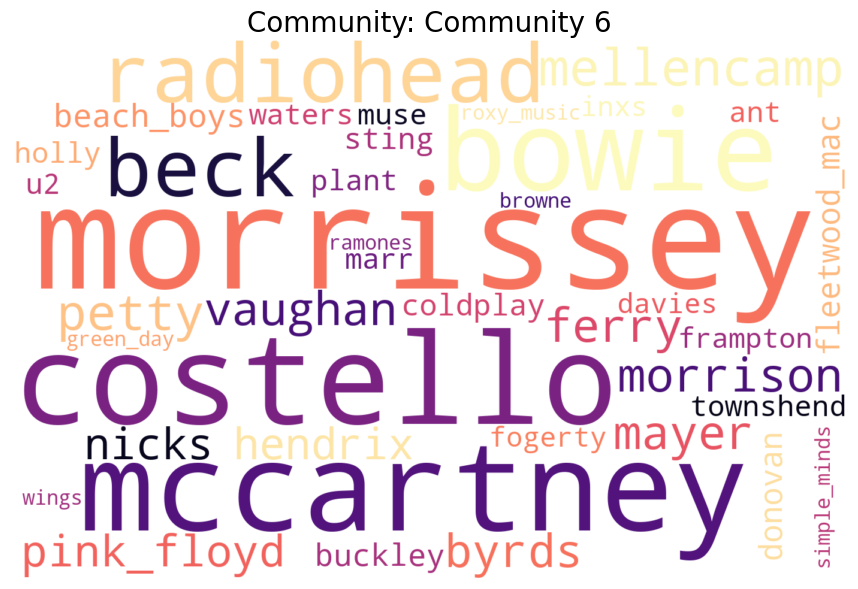

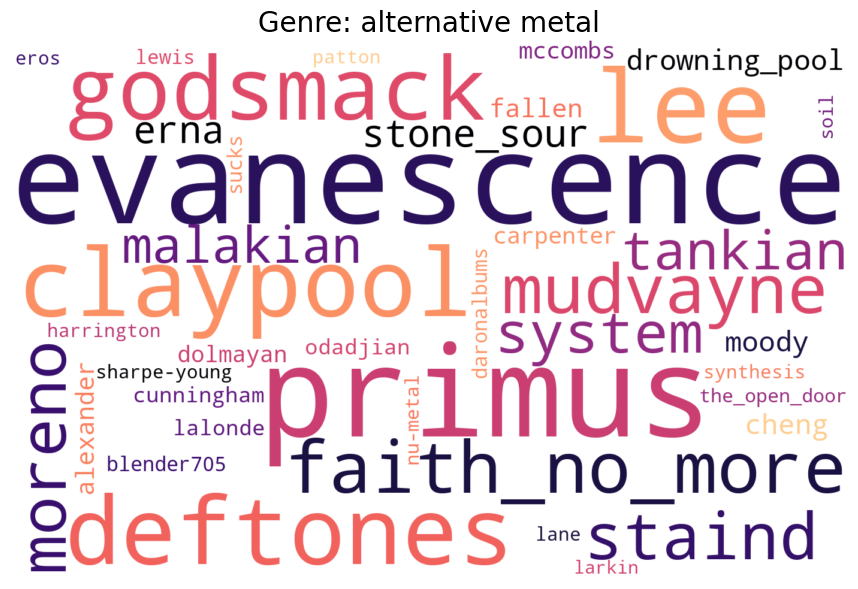

In [3]:
import re, numpy as np, pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Text Cleaning
def merge_proper_names(text):
    pattern = re.compile(r"\b([A-Z][a-z]+(?:\s+[A-Z][a-z]+)+)\b")
    return pattern.sub(lambda m: m.group(1).replace(" ", "_"), text)

def clean_text(txt):
    txt = merge_proper_names(txt)
    txt = txt.lower()
    txt = re.sub(r"\{\{.*?\}\}", " ", txt)
    txt = re.sub(r"\[\[.*?\]\]", " ", txt)
    txt = re.sub(r"http\S+|www\.\S+", " ", txt)
    txt = re.sub(r"[^a-z0-9_\-\s]", " ", txt)
    txt = re.sub(r"\s+", " ", txt).strip()
    return txt

cleaned_text = {d["page_name"]: clean_text(d["content"]) for d in data}



# Corpus Builder

def create_corpus(groups, filter_n=5):
    corpus = {}
    for label, nodes in groups.items():
        text = " ".join(cleaned_text.get(n, "") for n in nodes)
        tokens = re.findall(r"[a-z0-9_\-]+", text)
        counts = Counter(tokens)
        counts = {w:c for w,c in counts.items() if c >= filter_n}
        corpus[label] = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    return corpus


# Compute TF-IDF


def compute_tfidf(corpus):
    df = Counter()
    for doc in corpus.values():
        for w,_ in doc:
            df[w] += 1

    N = len(corpus) + 1e-9
    scored = {}

    for label, doc in corpus.items():
        total = sum(c for _,c in doc) + 1e-9
        scored[label] = sorted(
            [(w, c, (c/total) * np.log(N / df[w])) for w,c in doc],
            key=lambda x: x[2],
            reverse=True
        )
    return scored



# Communities (Louvain)

community_groups = {f"Community {i}": set(comm) for i,comm in enumerate(communities_louvain)}
comm_corpus = create_corpus(community_groups, filter_n=5)
comm_tfidf = compute_tfidf(comm_corpus)



# Genres

def clean_genres(glist):
    items=[]
    for g in glist:
        for p in re.split(r"[,\n/;]", g.lower()):
            p = p.strip()
            if p: items.append(p)
    seen=set(); result=[]
    for g in items:
        if g not in seen:
            seen.add(g); result.append(g)
    return result

df_gen=[]
for node in G_genre.nodes:
    gs = clean_genres(G_genre.nodes[node]["genres"])
    if gs:
        df_gen.append((node, gs[0]))

df_gen = pd.DataFrame(df_gen, columns=["artist","genre"])
genre_groups = df_gen.groupby("genre")["artist"].apply(set)
genre_groups = {g:n for g,n in genre_groups.items() if len(n)>=5}

genre_corpus = create_corpus(genre_groups, filter_n=5)
genre_tfidf = compute_tfidf(genre_corpus)



# Display TF-IDF Tables


def top_tfidf_table(scored, title, k=10):
    print(f"\n### TOP TF-IDF WORDS — {title} ###\n")
    df = pd.DataFrame({label: [w for (w,_,_) in lst[:k]] for label,lst in scored.items()})
    display(df)

top_tfidf_table(comm_tfidf, "COMMUNITIES (Top Words)")
top_tfidf_table(genre_tfidf, "GENRES (Top Words)")



# Word Cloud Visualization


def wordcloud(label, scored_list, title, max_words=40):
    freq = {w:score for (w,_,score) in scored_list[:max_words]}
    wc = WordCloud(width=1400, height=900, background_color="white", colormap="magma")
    wc = wc.generate_from_frequencies(freq)

    plt.figure(figsize=(11,7))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{title}: {label}", fontsize=20)
    plt.show()



wordcloud("Community 6", comm_tfidf["Community 6"], "Community")


first_genre = list(genre_tfidf.keys())[0]
wordcloud(first_genre, genre_tfidf[first_genre], "Genre")




## 3) Use the matrix D (Lecture 7, part 2) to dicusss the difference between the word-clouds between genres and communities.

**Answer** Using the matrix D to compare genres with communities shows that the two organization principles capture different underlying structures in the network. The TF-IDF genre word-clouds emphasize stylistic identity: the highest-weighted terms tend to be names of key artists, albums, or musical signifiers that clearly characterize the sound of the genre. In contrast, the community word-clouds do not group artists based on musical similarity but instead reflect the structural relationships in the network, such as shared band members, collaboration histories, or co-occurrence in musical projects. This is also visible in the confusion matrix, where most genres are spread across several communities rather than aligning with a single one, indicating that stylistic labels do not map cleanly onto collaboration clusters. As a result, the genre word-clouds are more cohesive and semantically interpretable in terms of musical style, while the community word-clouds often mix artists across genres, revealing social and historical linkages rather than aesthetic ones. Together, these results show that TF-IDF provides two complementary perspectives: genres describe what the music is, whereas communities describe how artists are connected in the cultural network.

## Author contributions

- **Emma** — Primary work on **Part 2, Part 3**.
- **Oliver** — Primary work on **Part 4**
- **Lucas** — Primary work on **Part 1**

All group members collaborated on debugging, interpretation, and editing.  
Each member reviewed the final notebook and understands the full workflow.